In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate
from tensorflow.keras.layers import Embedding, dot, Dot
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.preprocessing import sequence


import time
import numpy as np
import sys
import io
import os
import codecs
import random
import json
import re
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import pandas as pd
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

import urllib
import collections
import os
import zipfile

import numpy as np

import pickle 
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [23]:
quran_encoder = load_obj('quran_encoder')
sutras_encoder = load_obj('sutras_encoder')
vedas_encoder = load_obj('vedas_encoder')
bible_encoder = load_obj('bible_encoder')
tanakh_encoder = load_obj('tanakh_encoder')



In [24]:
quran_decoder = load_obj('quran_decoder')
sutras_decoder = load_obj('sutras_decoder')
vedas_decoder = load_obj('vedas_decoder')
bible_decoder = load_obj('bible_decoder')
tanakh_decoder = load_obj('tanakh_decoder')


In [25]:
def get_weights_from_file(fp):
    f = h5py.File(fp, 'r')
    # will get a list of layer names which you can use as index
    d = f['embedding']
    d = d[list(d.keys())[0]]
    d = d[list(d.keys())[0]]
    return d

#The data format is h5 so you can directly use the h5py library to inspect and load the weights. From the quickstart guide:
sutras_emb = get_weights_from_file('./weights/sutras.h5')
vedas_emb = get_weights_from_file('./weights/vedas.h5')
bible_emb = get_weights_from_file('./weights/bible.h5')
tanakh_emb = get_weights_from_file('./weights/tanakh.h5')
quran_emb = get_weights_from_file('./weights/quran.h5')

In [26]:
sutras_emb = pd.DataFrame(sutras_emb)
vedas_emb = pd.DataFrame(vedas_emb)
bible_emb = pd.DataFrame(bible_emb)
tanakh_emb = pd.DataFrame(tanakh_emb)
quran_emb = pd.DataFrame(quran_emb)

In [27]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(bible_emb)
print(distance_matrix.shape)

similar_words = {search_term: [bible_decoder[idx] for idx in distance_matrix[bible_encoder[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['good', 'love', 'creator', 'evil']}

similar_words

(6829, 6829)


{'good': ['thrones', 'fellow', 'comfort', 'try', 'thirst'],
 'love': ['kindled', 'sepulchres', 'spared', '721', 'husbands'],
 'creator': ['1025', 'anything', 'may', '944', 'asking'],
 'evil': ['nimshi', 'vex', 'families', 'mixed', '107']}

In [74]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
z = tsne.fit_transform(df)



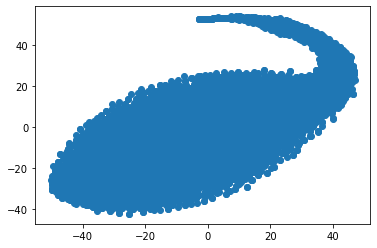

In [75]:
plt.scatter(z[:,0], z[:,1])

In [40]:
losses = load_obj('losses')

In [61]:
loss_df_orig = pd.DataFrame(losses)
loss_df = pd.DataFrame()

epochs, _ = zip(*loss_df_orig[col].values)

loss_df['epochs'] = epochs
for col in loss_df_orig.columns:
    _, loss = zip(*loss_df_orig[col].values)
    loss_df[col] = loss
    loss_df[col+'_mean'] = pd.Series(loss).expanding().mean()
    

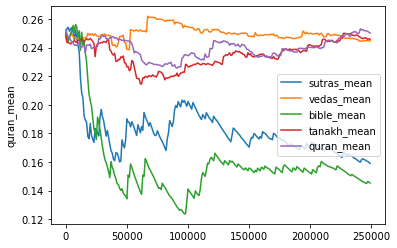

In [66]:
sns.lineplot(epochs, 'sutras_mean', data = loss_df, label = 'sutras_mean')
sns.lineplot(epochs, 'vedas_mean', data = loss_df, label = 'vedas_mean')
sns.lineplot(epochs, 'bible_mean', data = loss_df, label = 'bible_mean')
sns.lineplot(epochs, 'tanakh_mean', data = loss_df, label = 'tanakh_mean')
sns.lineplot(epochs, 'quran_mean', data = loss_df, label = 'quran_mean')

## Exp

What is the distance between light or good and dark or evil

In [77]:
m = load_model(r'C:\Users\jamesPC\source\repos\lstm_bible\model.h5')
m.layers